# NYC Residents Tested Positive for COVID-19

Data source: https://www1.nyc.gov/site/doh/health/health-topics/coronavirus.page

In [1]:
# Import dependencies
from datetime import datetime
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
# Read data from the CSV file into a pandas dataframe
df = pd.read_csv('../data/nyc/nyc.csv')

# Show the data
df

,update_date,update_time,nyc_residents_tested_positive,non-nyc_residents_tested_positive,total_tested_positive
0,2020-03-01,NaN,1.0,0.0,1.0
1,2020-03-02,NaN,1.0,0.0,1.0
2,2020-03-03,12:00,1.0,1.0,2.0
3,2020-03-04,11:00,1.0,1.0,2.0
4,2020-03-05,10:30,3.0,1.0,4.0
5,2020-03-06,12:00,4.0,1.0,5.0
6,2020-03-07,17:30,11.0,1.0,12.0
7,2020-03-08,14:30,12.0,1.0,13.0
8,2020-03-09,10:30,15.0,1.0,16.0
9,2020-03-10,9:30,24.0,1.0,25.0


In [3]:
# Create column with update date as a date object
df['update_date_obj'] = df['update_date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

# Set the orignal update_date column as index and rename it to update_date_str
df.set_index('update_date', inplace=True)
df.index.name = 'update_date_str'

# Show the data
df

,update_time,nyc_residents_tested_positive,non-nyc_residents_tested_positive,total_tested_positive,update_date_obj
update_date_str,,,,,
2020-03-01,NaN,1.0,0.0,1.0,2020-03-01
2020-03-02,NaN,1.0,0.0,1.0,2020-03-02
2020-03-03,12:00,1.0,1.0,2.0,2020-03-03
2020-03-04,11:00,1.0,1.0,2.0,2020-03-04
2020-03-05,10:30,3.0,1.0,4.0,2020-03-05
2020-03-06,12:00,4.0,1.0,5.0,2020-03-06
2020-03-07,17:30,11.0,1.0,12.0,2020-03-07
2020-03-08,14:30,12.0,1.0,13.0,2020-03-08
2020-03-09,10:30,15.0,1.0,16.0,2020-03-09


In [4]:
# Fill in the '2020-03-11' missing value in the 'nyc_residents_tested_positive' column
df.loc['2020-03-11', 'nyc_residents_tested_positive'] = df.loc['2020-03-11', 'total_tested_positive'] - \
                                                 df.loc['2020-03-10', 'non-nyc_residents_tested_positive']

# Cast the 'nyc_residents_tested_positive' values as integers
df['nyc_residents_tested_positive'] = df['nyc_residents_tested_positive'].astype(int)

# Show the data
df

,update_time,nyc_residents_tested_positive,non-nyc_residents_tested_positive,total_tested_positive,update_date_obj
update_date_str,,,,,
2020-03-01,NaN,1,0.0,1.0,2020-03-01
2020-03-02,NaN,1,0.0,1.0,2020-03-02
2020-03-03,12:00,1,1.0,2.0,2020-03-03
2020-03-04,11:00,1,1.0,2.0,2020-03-04
2020-03-05,10:30,3,1.0,4.0,2020-03-05
2020-03-06,12:00,4,1.0,5.0,2020-03-06
2020-03-07,17:30,11,1.0,12.0,2020-03-07
2020-03-08,14:30,12,1.0,13.0,2020-03-08
2020-03-09,10:30,15,1.0,16.0,2020-03-09


In [5]:
# Define a function to create the date labels to show in the plot
def date_labels(dates):
    first_label = dates[0].strftime("%#d\n%b\n%Y")
    last_label = dates[len(dates)-1].strftime("%#d\n%b\n%Y")
    labels = [first_label]
    for i in range(1, len(dates) - 1):
        label = dates[i].strftime("%#d")
        if dates[i].month != dates[i-1].month:
            label = label + dates[i].strftime("\n%b")
        labels.append(label)
    labels.append(last_label)
    return labels

# Create an 'update_date_label' column
df['update_date_label'] = date_labels(df['update_date_obj'])

# Show the data
df

,update_time,nyc_residents_tested_positive,non-nyc_residents_tested_positive,total_tested_positive,update_date_obj,update_date_label
update_date_str,,,,,,
2020-03-01,NaN,1,0.0,1.0,2020-03-01,1\nMar\n2020
2020-03-02,NaN,1,0.0,1.0,2020-03-02,2
2020-03-03,12:00,1,1.0,2.0,2020-03-03,3
2020-03-04,11:00,1,1.0,2.0,2020-03-04,4
2020-03-05,10:30,3,1.0,4.0,2020-03-05,5
2020-03-06,12:00,4,1.0,5.0,2020-03-06,6
2020-03-07,17:30,11,1.0,12.0,2020-03-07,7
2020-03-08,14:30,12,1.0,13.0,2020-03-08,8
2020-03-09,10:30,15,1.0,16.0,2020-03-09,9


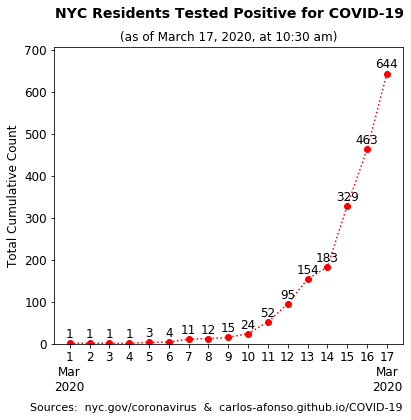

In [6]:
# Plot the data
ax = df.plot(x='update_date_label', y='nyc_residents_tested_positive', figsize=(6, 6), 
             fontsize=12, legend=False, color='red', linestyle=':', marker='o')

# Set the y-axis limits
plt.ylim(0, 1.1*max(df['nyc_residents_tested_positive']))

# Set the x-axis ticks
plt.xticks(range(len(df)), df['update_date_label'], fontsize=12)

# Set the plot title and subtitle
title_str = 'NYC Residents Tested Positive for COVID-19'
subtitle_str = '(as of March 17, 2020, at 10:30 am)'
plt.suptitle(title_str, x=0.54,fontsize=14, fontweight='bold')
plt.title(subtitle_str, fontsize=12)

# Set x- and y-axis labels
plt.xlabel('')
plt.ylabel('Total Cumulative Count', fontsize=12)

# Add text annotations showing the count/number on top of each data point
for xy in zip(range(len(df)), df['nyc_residents_tested_positive']):
    ax.annotate(str(xy[1]), xy=xy, xytext=(0, 9), textcoords='offset points', ha='center', va='center', fontsize=12)

# Add text note about the sources
text = 'Sources:  nyc.gov/coronavirus  &  carlos-afonso.github.io/COVID-19'
ax.text(-2, -160, text, fontsize=11)

# Set tight layout and show figure
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [7]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-residents-tested-positive-for-covid-19'
ax.figure.savefig(file_path + '.svg')
ax.figure.savefig(file_path + '.png', dpi=200)

In [8]:
# Export this notebook as a static HTML page
os.system('jupyter nbconvert --to html nyc-residents-tested-positive-for-covid-19.ipynb')

0